<a href="https://colab.research.google.com/github/PrachiHarish/ML-Projects/blob/main/Copy_of_SVM(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13905 sha256=48d29a329230ca67cdfc86a0d28887059422d9d770cfde25ffab4bd2b4f618e1
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
!pip show utils

Name: utils
Version: 1.0.2
Summary: A grab-bag of utility functions and objects
Home-page: http://github.com/haaksmash/pyutils
Author: Haak Saxberg
Author-email: haak.erling@gmail.com
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utils
from sklearn.svm import SVC

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    pyplot.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    pyplot.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    pyplot.xlabel('x_1')
    pyplot.ylabel('x_2')
    pyplot.legend(['label 1','label 0'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    pyplot.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    pyplot.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    pyplot.show()

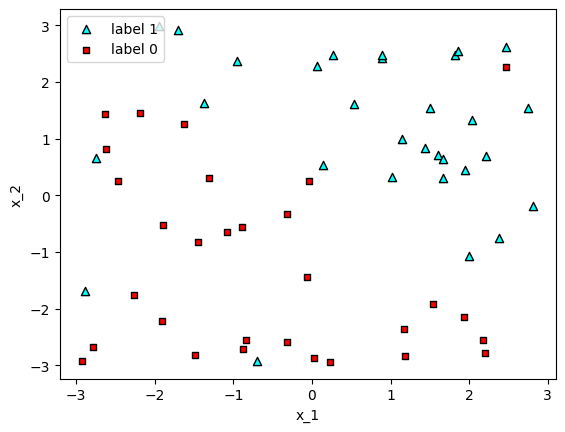

In [ ]:
linear_data = pd.read_csv('linear.csv')
features = np.array(linear_data[['x_1', 'x_2']])
labels = np.array(linear_data['y'])
plot_points(features, labels)

Accuracy: 0.9333333333333333


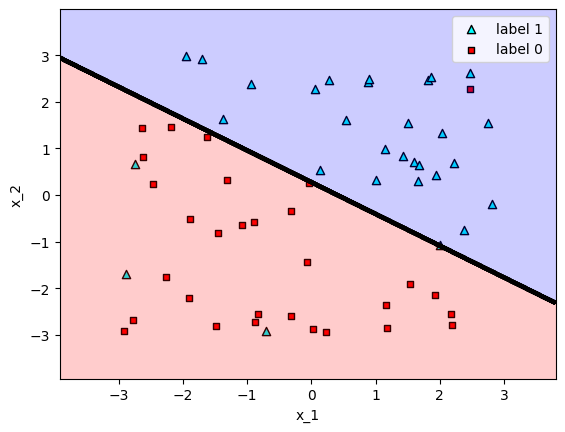

In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(features, labels)
print("Accuracy:", svm_linear.score(features, labels))
plot_model(features, labels, svm_linear)

C = 0.01
Accuracy: 0.8666666666666667


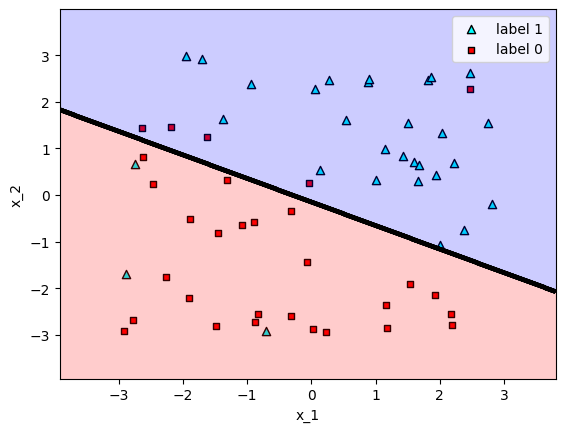

C = 100
Accuracy: 0.9166666666666666


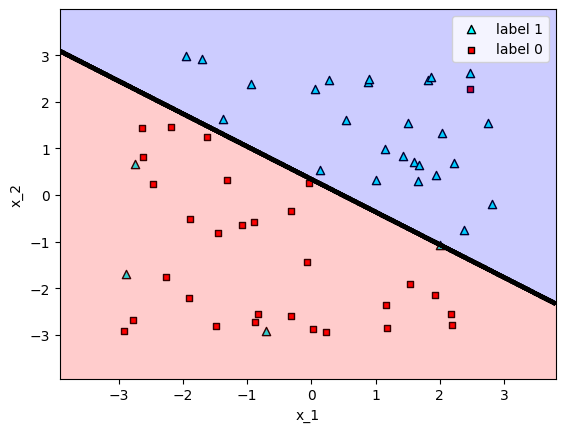

In [ ]:
# C = 0.01
svm_c_001 = SVC(kernel='linear', C=0.01)
svm_c_001.fit(features, labels)
print("C = 0.01")
print("Accuracy:", svm_c_001.score(features, labels))
plot_model(features, labels, svm_c_001)

# C = 100
svm_c_100 = SVC(kernel='linear', C=100)
svm_c_100.fit(features, labels)
print("C = 100")
print("Accuracy:", svm_c_100.score(features, labels))
plot_model(features, labels, svm_c_100)